# Ejercicios capitulo 2

**2.1**
Study the propagation of the relative error, for the case of division, $x = a/b$, by analogy to what was done in the main text for the case of multiplication.


 If     $x= \cfrac{a}{b}$ $\Rightarrow$ $\tilde{x}= \cfrac{\tilde{a}}{\tilde{b}}$ 

Now aply the definition of $\tilde{a}$

$\tilde{a}=a(1+\delta a)$   and $\tilde{b}=b(1+\delta b)$

Then 
$\delta x = \cfrac{\tilde{x}-x}{x}= \cfrac{\cfrac{\tilde{a}}{\tilde{b}}- \cfrac{a}{b}}{\cfrac{a}{b}}= \cfrac{\cfrac{a(1+\delta a)}{b(a+\delta b)}-\cfrac{a}{b}}{\cfrac{a}{b}}= \cfrac{\cfrac{a}{b} \left(\cfrac{1+\delta a}{1+\delta b} \right)-1} {\cfrac{a}{b}}$


$= \cfrac{1+\delta a}{1+ \delta b}-1= \cfrac{1+\delta a -1-\delta b}{1+ \delta b}= \cfrac{\delta a - \delta b}{1+\delta b}=\delta a-\delta b$

consider than $\delta b \ll 1$

R. Hence $|\delta x| \leq |\delta a|-|\delta b|$

**2.4** Without rounding error, the following code’s output would be $f (x) = x$ (Note that this has nothing to do with catastrophic cancellation.) Determine what’s going on, remembering our comment (section 2.4) on one or two iterations being the culprits.

In [47]:
from math import sqrt
def f(x,nmax=100):
    for i in range(nmax):
        x = sqrt(x)
    for i in range(nmax):
        x = x**2
    return x
for xin in (5., 0.5):
    xout = f(xin); print(xin, xout)

5.0 1.0
0.5 0.0


R. 

**2.7** We promised to return to the distinction between catastrophic and benign cancellation. Take $\tilde{x}$ and $\tilde{y}$ to be: $\tilde{x}= 1234567891234567.0$ and $\tilde{y} = 1234567891234566.0$
Now, if we try to evaluate $\tilde{x}^2 - \tilde{y}^2$ we will experience catastrophic cancellation: each
of the squaring operations leads to a rounding error and then the subtraction exacerbates that dramatically. Write a Python code that does the following:

(a) Carries out the calculation $1234567891234567^2 − 1234567891234566^2$ using integers, i.e., exactly.

(b) Carries out the subtraction
$1234567891234567.0^2−1234567891234566.0^2$ using
ﬂoats, i.e., exhibiting catastrophic cancellation.

(c) Now, we will employ a trick: $x^2 − y^2$ can be re-expressed as $(x − y)(x + y)$. Try
using this trick for the ﬂoats and see what happens. Does your answer match the integer answer or the catastrophic-cancellation answer? Why?


In [120]:
x=1234567891234567
y=1234567891234566
x0=1234567891234567.0
y0=1234567891234566.0

In [121]:
rx=pow(x,2)
ry=pow(y,2)

In [122]:
r=rx-ry

In [123]:
print(rx), print(ry), print (r)

1524157878067365654031415677489
1524157878067363184895633208356
2469135782469133


(None, None, None)

In [124]:
r0=x0**2-y0**2

In [125]:
print(r0)

2533274790395904.0


In [126]:
rt1=(x-y)
rt2=(x+y)

rt10=(x0-y0)
rt20=(x0+y0)


In [127]:
rt=rt1*rt2
rt0=rt10*rt20

In [128]:
print(rt), print(rt0)

2469135782469133
2469135782469133.0


(None, None)

In [129]:
s=rt-r
s0=rt-r0
s1=rt0-r
s10=rt0-r0

In [130]:
print(s), print(s0), print (s1), print(s10)

0
-64139007926771.0
0.0
-64139007926771.0


(None, None, None, None)

R. We can evade the catastrophic cancellation with use of integers, or use elemental operation instead of operations more difficults with float


**2.10** As a statistical warmup to chapters 6 and 7, evaluate the mean of the n values $x_i : \mu = \sum_{i=0}^{n−1} \cfrac{ x_i} {n}$. You can evaluate the variance using a two-pass algorithm:

$\sigma^2=\cfrac{1}{n}\sum_{i=0}^{n-1}(x_i-\mu)^2$

This is called a two-pass algorithm because you need to evaluate the mean ﬁrst, so you have to loop through the xi once to get the mean and a second time time to get the variance. Many people prefer the following one-pass algorithm:

$\sigma^2=\left(\cfrac{1}{n}\sum_{i=0}^{n-1}x_i^2\right)-\mu^2$

You should be able to see that this formula allows you to keep running sums of the $x_i$ and the $x_i^2$ values in parallel and then perform only one subtraction at the end.
Naively, you might think that the two-pass algorithm will suﬀer from more roundoﬀ error problems, since it involves n subtractions. On the other hand, if you solved problem 2.7 on $\tilde{x}^2 − \tilde{y}^2$ , you might be more wary of subtracting the squares of two
nearly equal numbers (which is what the one-pass algorithm does). Write two Python functions, one for each algorithm, and test them on the two cases below: 

$x_i=0, 0.01, 0.02,..., 0.09$
$x_i=123456789.0, 123456789.01, 123456789.02,..., 123456789.09$


In [108]:
import numpy as np

def numeros(ini,fi,N):
    numeros=np.linspace(ini,fi,N)
    return numeros

def mu(ini,fi,N):
    suma=0
    numeros=np.linspace(ini,fi,N)
    for i in numeros:
        suma+=i
    m=suma/N
    return m

def resta(x,ini,fi,N):
    return (x-mu(ini,fi,N))**2    

def v(ini,fi,N):
    numeros2=resta(numeros(ini,fi,N),ini,fi,N)
    suma=0
    for i in numeros2:
        suma+=i
    va=suma/N
    return va

In [109]:
print(numeros(1.00,1.09,10)), print (mu(1.00,1.09,10)), print(numeros2), print(v(1.00,1.09,10))

[1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09]
1.045
[0.2025 0.1225 0.0625 0.0225 0.0025 0.0025 0.0225 0.0625 0.1225 0.2025]
0.0008250000000000014


(None, None, None, None)

In [116]:
import numpy as np

def numeros(ini,fi,N):
    numeros=np.linspace(ini,fi,N)
    return numeros

def mu1(ini,fi,N):
    suma=0
    numeros=np.linspace(ini,fi,N)
    for i in numeros:
        suma+=i
    m=suma/N
    return m

def po(x):
    return (x)**2

def var(ini,fi,N):
    numeross=po(numeros(ini,fi,N))
    suma=0
    for i in numeross:
        suma+=i
    var=(suma/N)-(mu1(ini,fi,N))**2
    return var


In [117]:
print(mu1(1.00,1.09,10)), print(var(1.00,1.09,10))

1.045
0.0008250000000000757


(None, None)

In [112]:
print(numeros(123456789.00,123456789.09,10)), print (mu(123456789.00,123456789.09,10)) ,print(v(123456789.00,123456789.09,10))

[1.23456789e+08 1.23456789e+08 1.23456789e+08 1.23456789e+08
 1.23456789e+08 1.23456789e+08 1.23456789e+08 1.23456789e+08
 1.23456789e+08 1.23456789e+08]
123456789.04499999
0.0008250000357630238


(None, None, None)

In [118]:
print(mu1(123456789.00,123456789.09,10)), print(var(123456789.00,123456789.09,10))

123456789.04499999
4.0


(None, None)

**2.13** This problem studies a new rational function:

$t(x)=\cfrac{7x^4-101x^3+540x^2-1204x+958}{x^4-14x^3+72x^2-151x+112}$

Notice that the denominator is the same as in problem 2.12.

(a) Plot $t(x)$, evaluated via Horner’s rule, along with the following (equivalent) continued fraction, from $x = 0$ to $x = 4$:

$u(x)=7-\cfrac{3}{x-2-\cfrac{1}{x-7+\cfrac{10}{x-2-\cfrac{2}{x-3}}}}$

You may wish to know that:

$u(1)=10, u(2)=7, u(3)=4.6, u(4)=5.5 $

(b) Evaluate each of these functions for $x = 10^{77}$ (make sure to use ﬂoats in your
code). Do you understand what is happening? Are you starting to prefer one
formulation over the other? (What happens if you use integers instead of ﬂoats?)

(c) Plot the two Python functions (t(x) and u(x)) for $x = 2.400 + 2^{−52} i$, where i goesfrom 0 to 800. Was your intuition (about which formulation is better) correct?

In [2]:
def horner(coef,x0,xf):
    n=len(coef)
    x=xf-x0
    for i in range (x):
        poli=coef[n-1]
        polin=0
        for j in range(n-1,0,-1):
            polin=(poli)*i+coef[j-1]
            poli=polin
       # print ([i,poli])
    return poli

def horner2(x):
    coef=[958,-1204,540,-101,7]
    n=len(coef)
    poli=coef[n-1]
    polin=0
    for j in range(n-1,0,-1):
        polin=(poli)*x+coef[j-1]
        poli=polin
    #print ([x,poli]) 
    return poli

def horner3(x):
    coef=[112,-151,72,-14,1]
    n=len(coef)
    poli=coef[n-1]
    polin=0
    for j in range(n-1,0,-1):
        polin=(poli)*x+coef[j-1]
        poli=polin
    #print ([x,poli]) 
    return poli

def horapp(x):
    return horner2(x)/horner3(x)

In [1]:
def u(x):
    ux=7-3/(x-2-1/(x-7+10/(x-2-2/(x-3))))
    return ux


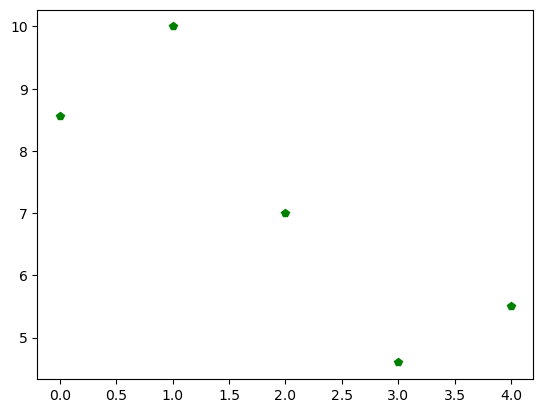

In [4]:
from matplotlib import pyplot
x = range(0, 5)
pyplot.plot(x, [horapp(i) for i in x],'gp')
pyplot.show()


In [5]:
eh=horner2(pow(10,77))/horner3(pow(10,77))
eu=u(pow(10,77))
print("horner=",eh,"ux=", eu)


horner= 7.0 ux= 7.0


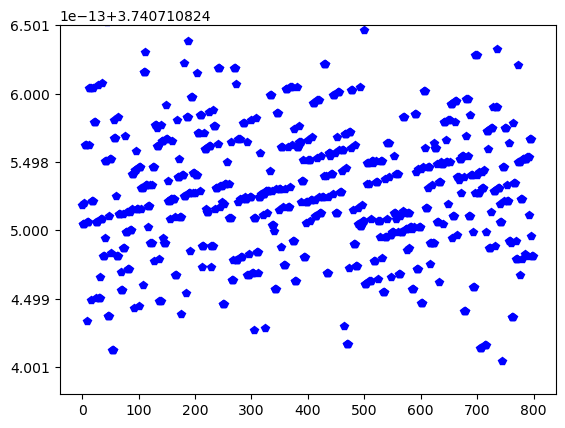

In [7]:
from matplotlib import pyplot

z= range(0,800)
hlista=[horapp(2.400+(2**(-52))*j) for j in z]
pyplot.ylim(9.38*10**(-12)+3.74071082390, 9.65*10**(-12)+3.74071082390)
pyplot.plot(z,hlista,'bp')
pyplot.show()


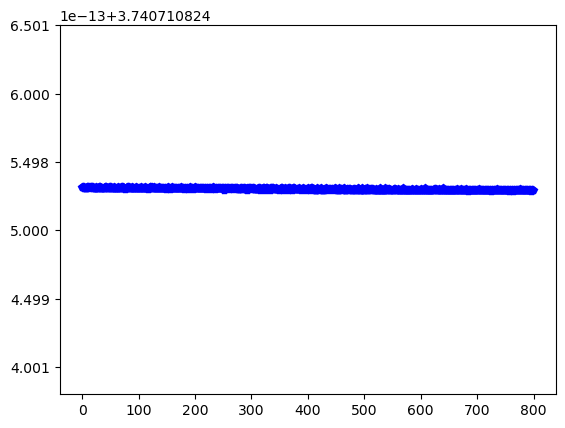

In [4]:
from matplotlib import pyplot

z= range(0,800)
hlista=[u(2.400+(2**(-52))*j) for j in z]
pyplot.ylim(9.38*10**(-12)+3.74071082390, 9.65*10**(-12)+3.74071082390)
pyplot.plot(z,hlista,'bp')
pyplot.show()


R=


 **2.16** 
In this problem we will learn how to accelerate the convergence of a sequence. We will accomplish this by transforming a sequence $p_n$ obeying $lim_{n→\infty} p_n = \xi$ into another sequence $q_n$ that converges more quickly to $\xi$.

(a) Assume the sequence $p_n$ converges to $\xi$ like a geometric series with a factor C:

$p_{n+1} − \xi = C(p_n − \xi)$,       n = 1, 2, . . .

Apply this equation a second time taking $n \rightarrow n + 1$ and then eliminate C; you can then solve the resulting equation for $\xi$. This takes the form:

$q_n=p_n-\cfrac{(p_{n+1}-p_n)^2}{p_n+p_{n+2}-2p_{n+1}}$

where we took the opportunity to write $q_n$ on the left-hand side (instead of $\xi$) to emphasize that this is a new sequence (in practice, the starting relation is likely to be only approximately valid). This technique is known as
Aitken extrapolation or Aitken’s $\Delta^2$ method.

We will now apply Aitken extrapolation, to the following problem:

$\sum_{k=1}^{\infty}\cfrac{(-1)^{k+1}}{k}=ln 2 =0.693 147 180 559 945 3 ...$

To do so, treat the partial sums as the terms of your original sequence:

$p_n=\sum_{k=1}^{n}\cfrac{(-1)^{k+1}}{k}$

You should ﬁnd that when $n = 100$ or so the Aitken-extrapolated $q_n$’s have converged on six signiﬁcant ﬁgures of the true answer, whereas the (untransformed) partial sums $p_n$’s are still struggling with the second signiﬁcant ﬁgure.

In [93]:
def PN(n):
    pn0=0
    for j in range(n+1):
        pn=pn0+((-1)**(j+2))/(j+1)
        pn0=pn
    #print("pn=",pn)
    return pn
def aitken(n):
    return PN(n)-(((PN(n+1)-PN(n))**2)/(PN(n)+PN(n+2)-2*PN(n+1)))

In [96]:
print("aitken=",aitken(100),"pn=",PN(100))

aitken= 0.6931472966210653 pn= 0.6980731694092049


**2.19** Compare the output of legendre.py with that of the recurrence relation for $n = 1000$:

$P_n(x)=2xP_{n-1}(x)-P_{n-2}(x)-\cfrac{xP_{n-1}(x)-P_{n-2(x)}}{n}$

In [128]:
import matplotlib.pyplot as plt
def legendre(n,x):
    if n==0:
        val2 = 1.
        dval2 = 0.
    elif n==1:
        val2 = x
        dval2 = 1.
    else:
        val0 = 1.; val1 = x
        for j in range(1,n):
            val2 = ((2*j+1)*x*val1 - j*val0)/(j+1)
            val0, val1 = val1, val2
        dval2 = n*(val0-x*val1)/(1.-x**2)
    return val2, dval2

def plotlegendre(der,nsteps):
    plt.xlabel('$x$', fontsize=20)
    
    dertostr = {0: "$P n(x)$", 1: "$P n’(x)$"}
    plt.ylabel(dertostr[der], fontsize=20)
    
    ntomarker = {1: 'k-', 2: 'r--', 3: 'b-.', 4: 'g:', 5: 'c:'}
    xs = [i/nsteps for i in range(-nsteps+1,nsteps)]
    for n,marker in ntomarker.items():
        ys = [legendre(n,x)[der] for x in xs]
        labstr = 'n={0}'.format(n)
        plt.plot(xs, ys, marker, label=labstr, linewidth=3)

    plt.ylim(-3*der-1, 3*der+1)
    plt.legend(loc=4)
    plt.show()
    
if __name__ == '__main__ ':
    nsteps = 1000
    plotlegendre(0,nsteps)
    plotlegendre(1,nsteps)

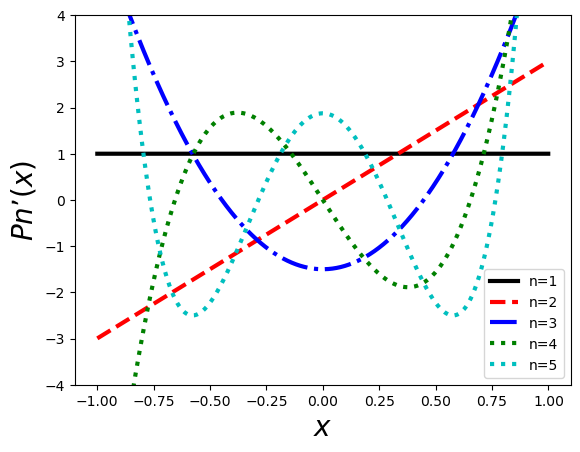

In [153]:
plotlegendre(1,1000)

In [161]:
import matplotlib.pyplot as plt
def legendre2(n,x):
    if n==0:
        val2 = 1.
        dval2 = 0.
    elif n==1:
        val2 = x
        dval2 = 1.
    else:
        val0 = 1.; val1 = x
        for j in range(1,n):
            val2 = ((2*j+1)*x*val1 - j*val0)/(j+1)
            val0, val1 = val1, val2
        dval2 = n*(val0-x*val1)/(1.-x**2)
    return dval2

def legendre3(n,x):
    pn=2*x*legendre2((n-1),x)-legendre2((n-2),x)-(x*legendre2((n-1),x)-legendre2((n-2),x))/(n)
    return pn

def plotlegendre2(der,nsteps):
    plt.xlabel('$x$', fontsize=20)
    
    dertostr = {0: "$P n(x)$", 1: "$P n’(x)$"}
    plt.ylabel(dertostr[der], fontsize=20)
    
    ntomarker = {1: 'k-', 2: 'r--', 3: 'b-.', 4: 'g:', 5: 'c:'}
    xs = [i/nsteps for i in range(-nsteps+1,nsteps)]
    for n,marker in ntomarker.items():
        ys = [legendre3(n,x) for x in xs]
        labstr = 'n={0}'.format(n)
        plt.plot(xs, ys, marker, label=labstr, linewidth=3)

    plt.ylim(-3*der-1, 3*der+1)
    plt.legend(loc=4)
    plt.show()
    
if __name__ == '__main__ ':
    nsteps = 1000
    plotlegendre(0,nsteps)
    plotlegendre(1,nsteps)

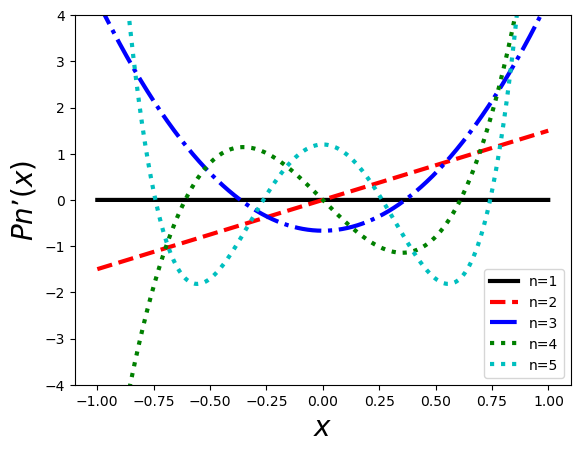

In [162]:
plotlegendre2(1,1000)

**2.22** This problem studies the evaluation of Chebyshev polynomials and their extrema, known as Chebyshev points. First, implement the following recurrence relation:

$T_{n+1}(x) = 2xT_n(x) − T_{n−1} (x)$

starting from the known functions $T_0(x) = 1$ and $T_1 (x) = x$. Plot the ﬁrst few Chebyshev polynomials from x = −1 to x = +1. Second, use trigonometric identities to show (analytically) that the representation:

$T_n (x) = cos (n cos^{−1} (x))$

is equivalent to that in Eq. (2.122). Finally, use Eq to show that the n extrema of $T_{n−1} (x)$ are:
    $x_j=-cos(\cfrac{j\pi}{n-1})$    j=0,1,...,n-1

In [2]:
def chebysev(n,x):
    if n==0:
        val2 = 1.
    elif n==1:
        val2 = x
    else:
        val0 = 1.; val1 = x
        for j in range(1,n+1):
            val2 =2*x*val1-val0 
            val0, val1 = val1, val2
    return val2

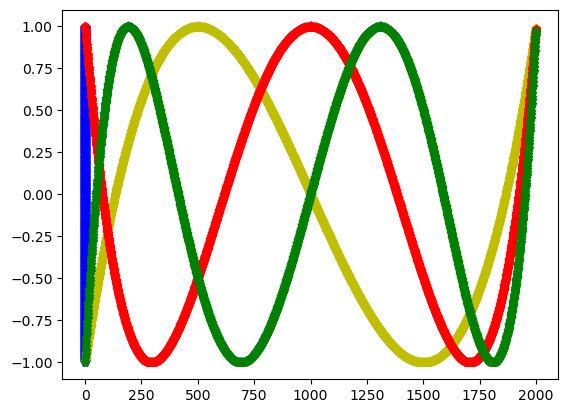

In [17]:
from matplotlib import pyplot
g=[chebysev(1,j) for j in x]
k=[chebysev(2,j) for j in x]
l=[chebysev(3,j) for j in x]
m=[chebysev(4,j) for j in x]

x=[-1+i*0.001 for i in range(2000)]
pyplot.plot(x,g ,'bp', k, 'yp', l,'rp', m, 'gp' )
pyplot.show()

For the second part we have that:

$T_n(x)= cos(ncos^{-1}(x))$

Then we can rewrite as follows:

$T_n(x)=\cfrac{cos(ncos^{-1}(x))\cdot 2x}{2x}$
$T_n(x)=\cfrac{cos(ncos^{-1}(x))\cdot x +cos(ncos^{-1}(x)) \cdot x }{2x}= \cfrac{cos(ncos^{-1}(x))\cdot x +cos(ncos^{-1}(x)) \cdot x + sen(ncos^{-1}(x))sen(cos^{-1}(x)) - sen(ncos^{-1}(x))sen(cos^{-1}(x))}{2x} = \cfrac{cos(ncos^{-1}(x))\cdot cos(cos^{-1}(x))+ ncos^{-1}(x))\cdot cos(cos^{-1}(x)) +sen(ncos^{-1}(x))sen(cos^{-1}(x))-sen(ncos^{-1}(x))sen(cos^{-1}(x))}{2x} = \cfrac{cos(ncos^{-1}(x))\cdot cos(cos^{-1}(x))+sen(ncos^{-1}(x))sen(cos^{-1}(x))+ cos(ncos^{-1}(x))\cdot cos(cos^{-1}(x))-sen(ncos^{-1}(x))sen(cos^{-1}(x))}{2x}=\cfrac{cos(ncos^{n-1}(x)+cos^{-1}(x))+cos(ncos^{n-1}(x)-cos^{-1}(x))}{2x}=\cfrac{cos((n+1)cos^{-1}(x))+cos((n-1)cos^{-1}(x))}{2x}=\cfrac{T_{n+1}+T_{n-1}}{2x}$

That is eqivalent to the recurrence relation of the subsection a).